<a href="https://colab.research.google.com/github/cktripathi10/cktripathi10/blob/main/Chandan_Kumar_Tripathi_pj_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 3: (10 points)
your total (50 points) will divided by 5 to get 10 points for this project.


In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses.

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis.
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [48]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy as np
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3- Loading Data ( 1 point)

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [49]:
# write your code here
df= pd.read_excel('Online Retail.xlsx')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


4- Print out the first 10 rows of the DataFrame. ( 1 point)

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [27]:
# write your code here
print(df.head(10))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5- Print out the data type for each column in the DataFrame. (1 point)

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [28]:
# write your code here
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications (2 points)

In [50]:
# write your code here

# Calculate and print the dimensions of the DataFrame
dataframe_dimensions = df.shape

# Calculate the number of unique invoice numbers and customer IDs
unique_invoice_numbers = df['InvoiceNo'].nunique()
unique_customer_ids = df['CustomerID'].nunique()

print("Dimensions of the DataFrame:", dataframe_dimensions)
print("Number of unique Invoice Numbers:", unique_invoice_numbers)
print("Number of unique Customer IDs:", unique_customer_ids)


Dimensions of the DataFrame: (541909, 8)
Number of unique Invoice Numbers: 25900
Number of unique Customer IDs: 4372


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent" ( 1 points)

In [51]:
# write your code here
df['IsCPresent']= df['InvoiceNo'].astype(str).str.startswith('C')
df['IsCPresent'].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    False
1    False
2    False
3    False
4    False
Name: IsCPresent, dtype: bool

b. (3 points)
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned),
- Remove all invoice numbers starting with "C" using the column created in previous step
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value.
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [52]:
# write your code here
# Filter out transactions with zero or negative quantity (i.e., items were returned)
filtered_data = df[df['Quantity'] > 0]

# Remove all invoice numbers starting with "C"
filtered_data = filtered_data[~filtered_data['IsCPresent']]

# Subset the DataFrame to keep only InvoiceNo and Description columns
filtered_data = filtered_data[['InvoiceNo', 'Description']]

# Drop all rows with at least one missing value
filtered_data = filtered_data.dropna()

# Rename the DataFrame to online1
online1 = filtered_data

# Print out the first 10 rows of the filtered DataFrame
print(online1.head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


c. Approximately, how many rows and invoice numbers have already removed? ( 2 points)

--
### The number of rows removed are: 11216
### The total invoice numbers removed are: 5764

In [53]:
#write your code here to prove your answer:
original_rows= df.shape[0]
original_invoices= df['InvoiceNo'].nunique()
new_rows= online1.shape[0]
new_invoices= online1['InvoiceNo'].nunique()
print(f'The number of rows removed are: {original_rows-new_rows}')
print(f'The total invoice numbers removed are: {original_invoices-new_invoices}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The number of rows removed are: 11216
The total invoice numbers removed are: 5764


d. (2 points)
- Extract the invoice numbers from the DataFrame as a list.
- Remove duplicate elements to create a list of unique invoice numbers.
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [54]:
# Extract the invoice numbers from the DataFrame as a list
invoice_numbers_list = online1['InvoiceNo'].tolist()

# Permanently remove duplicate invoice numbers in the DataFrame
online1 = online1.drop_duplicates(subset=['InvoiceNo'])

# Confirm the removal by printing the length of the DataFrame after deduplication
print("Number of unique invoices in the DataFrame:", online1.shape[0])



Number of unique invoices in the DataFrame: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000( 1 point)

In [55]:
# write your code here
# Cut the list to only include the first 5,000 elements
cut_list = invoice_numbers_list[:5000]

# Print out the length of the new list to confirm the length
print("Length of the cut list:", len(cut_list))


Length of the cut list: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1( 1 point)

In [56]:
# write your code here
# Filter the online1 DataFrame to only include rows with invoice numbers in the unique list
online1 = online1[online1['InvoiceNo'].isin(cut_list)]

# Print out the first 10 rows of the filtered DataFrame
print(online1.head(10))


   InvoiceNo                         Description
0     536365  WHITE HANGING HEART T-LIGHT HOLDER
7     536366              HAND WARMER UNION JACK
9     536367       ASSORTED COLOUR BIRD ORNAMENT
21    536368            JAM MAKING SET WITH JARS
25    536369            BATH BUILDING BLOCK WORD
26    536370           ALARM CLOCK BAKELIKE PINK
46    536371     PAPER CHAIN KIT 50'S CHRISTMAS 
47    536372           HAND WARMER RED POLKA DOT
49    536373  WHITE HANGING HEART T-LIGHT HOLDER
65    536374          VICTORIAN SEWING BOX LARGE


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful (1 point)

In [57]:
# write your code here
# Print the dimensions of the DataFrame 'online1'
dimensions_online1 = online1.shape

# Calculate the number of unique invoice numbers in 'online1'
unique_invoices_online1 = online1['InvoiceNo'].nunique()

dimensions_online1, unique_invoices_online1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((264, 2), 264)

h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list (2 points)

In [58]:
# write your code here
invoice_item_list = []

# Iterate over each unique invoice number
for invoice in cut_list:

    items_list = online1[online1['InvoiceNo'] == invoice]['Description'].tolist()

    invoice_item_list.append(items_list)

# Print out elements one through four of the invoice_item_list
invoice_item_list[0:4]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['WHITE HANGING HEART T-LIGHT HOLDER'],
 ['WHITE HANGING HEART T-LIGHT HOLDER'],
 ['WHITE HANGING HEART T-LIGHT HOLDER'],
 ['WHITE HANGING HEART T-LIGHT HOLDER']]

8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. (2 points)

In [59]:
# write your code here
from mlxtend.preprocessing import TransactionEncoder

# Initialize the transaction encoder
encoder = TransactionEncoder()

# Fit and transform the transaction data to a boolean array
transaction_data_encoded = encoder.fit_transform(invoice_item_list)

# Convert the encoded data into a pandas DataFrame
encoded_df = pd.DataFrame(transaction_data_encoded, columns=encoder.columns_)

# Print out an example of the resulting encoded data DataFrame
print(encoded_df.head())
encoder.columns_



   12 PENCILS SMALL TUBE RED RETROSPOT  3 HOOK PHOTO SHELF ANTIQUE WHITE  \
0                                False                             False   
1                                False                             False   
2                                False                             False   
3                                False                             False   
4                                False                             False   

   3 STRIPEY MICE FELTCRAFT  3 TRADITIONAl BISCUIT CUTTERS  SET  \
0                     False                               False   
1                     False                               False   
2                     False                               False   
3                     False                               False   
4                     False                               False   

   5 STRAND GLASS NECKLACE CRYSTAL  60 CAKE CASES VINTAGE CHRISTMAS  \
0                            False                            False  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['12 PENCILS SMALL TUBE RED RETROSPOT',
 '3 HOOK PHOTO SHELF ANTIQUE WHITE',
 '3 STRIPEY MICE FELTCRAFT',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 '5 STRAND GLASS NECKLACE CRYSTAL',
 '60 CAKE CASES VINTAGE CHRISTMAS',
 'AIRLINE BAG VINTAGE JET SET WHITE',
 'ALARM CLOCK BAKELIKE PINK',
 'ALARM CLOCK BAKELIKE RED ',
 'ANT WHITE WIRE HEART SPIRAL',
 'ANTIQUE SILVER TEA GLASS ENGRAVED',
 'ANTIQUE SILVER TEA GLASS ETCHED',
 'ASSORTED BOTTLE TOP  MAGNETS ',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'ASSORTED COLOUR T-LIGHT HOLDER',
 'ASSORTED COLOURS SILK FAN',
 'BAG 125g SWIRLY MARBLES',
 'BATH BUILDING BLOCK WORD',
 'BIRD HOUSE HOT WATER BOTTLE',
 'BLACK CANDELABRA T-LIGHT HOLDER',
 'BLACK ENCHANTED FOREST PLACEMAT',
 'BLACK HEART CARD HOLDER',
 'BLACK RECORD COVER FRAME',
 'BLACK SWEETHEART BRACELET',
 'BLUE HARMONICA IN BOX ',
 'BLUE/CREAM STRIPE CUSHION COVER ',
 'BOX OF 24 COCKTAIL PARASOLS',
 'BREAD BIN DINER STYLE RED ',
 'Bank Charges',
 'CAKE PLATE LOVEBIRD WHITE',
 'CAMOUFLAGE LED TORCH',

b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values (2 points)

In [60]:
# Rename the encoded DataFrame for clarity
online_encoder_df = encoded_df

# Find a subset that features both True and False values
# This involves finding a few rows where both True and False are present, which is common in this data
subset_online_encoder_df = online_encoder_df[(online_encoder_df == True).any(axis=1) & (online_encoder_df == False).any(axis=1)].head()

# Print the subset of the DataFrame
subset_online_encoder_df



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,12 PENCILS SMALL TUBE RED RETROSPOT,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 STRIPEY MICE FELTCRAFT,3 TRADITIONAl BISCUIT CUTTERS SET,5 STRAND GLASS NECKLACE CRYSTAL,60 CAKE CASES VINTAGE CHRISTMAS,AIRLINE BAG VINTAGE JET SET WHITE,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANT WHITE WIRE HEART SPIRAL,...,WHITE WIRE EGG HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOOD S/3 CABINET ANT WHITE FINISH,WOODEN BOX OF DOMINOES,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP PINK FAIRY CAKES,YELLOW SHARK HELICOPTER,YULETIDE IMAGES GIFT WRAP SET,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


c. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers. (1 point)

In [61]:
# write your code here
print("Dimensions of the encoded DataFrame:", encoded_df.shape)


Dimensions of the encoded DataFrame: (5000, 195)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

--
### Dataset:
you can find the dataset on Canvas under Dataset section: "wholesale_customers_data.csv"

In [62]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. Load the wholesale customers dataset (1 point)

In [64]:
# write your code here
ws_df=pd.read_csv('wholesale_customers_data.csv')
ws_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


2. Drop Channel & Region and print the current columns ( 1 point)

In [65]:
# write your code here
# Drop the 'Channel' and 'Region' columns from the dataset
ws_df = ws_df.drop(['Channel', 'Region'], axis=1)

# Print the current columns of the dataset after dropping
current_columns = ws_df.columns.tolist()
current_columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

### Data Exploration:

You will begin exploring the data through visualizations and code to understand how each feature is related to the others.



3. Show a statistical summary for each of the above product categories. (1 point)

In [66]:
# write your code here
# Generate a statistical summary for the remaining product categories
statistical_summary = ws_df.describe()
statistical_summary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


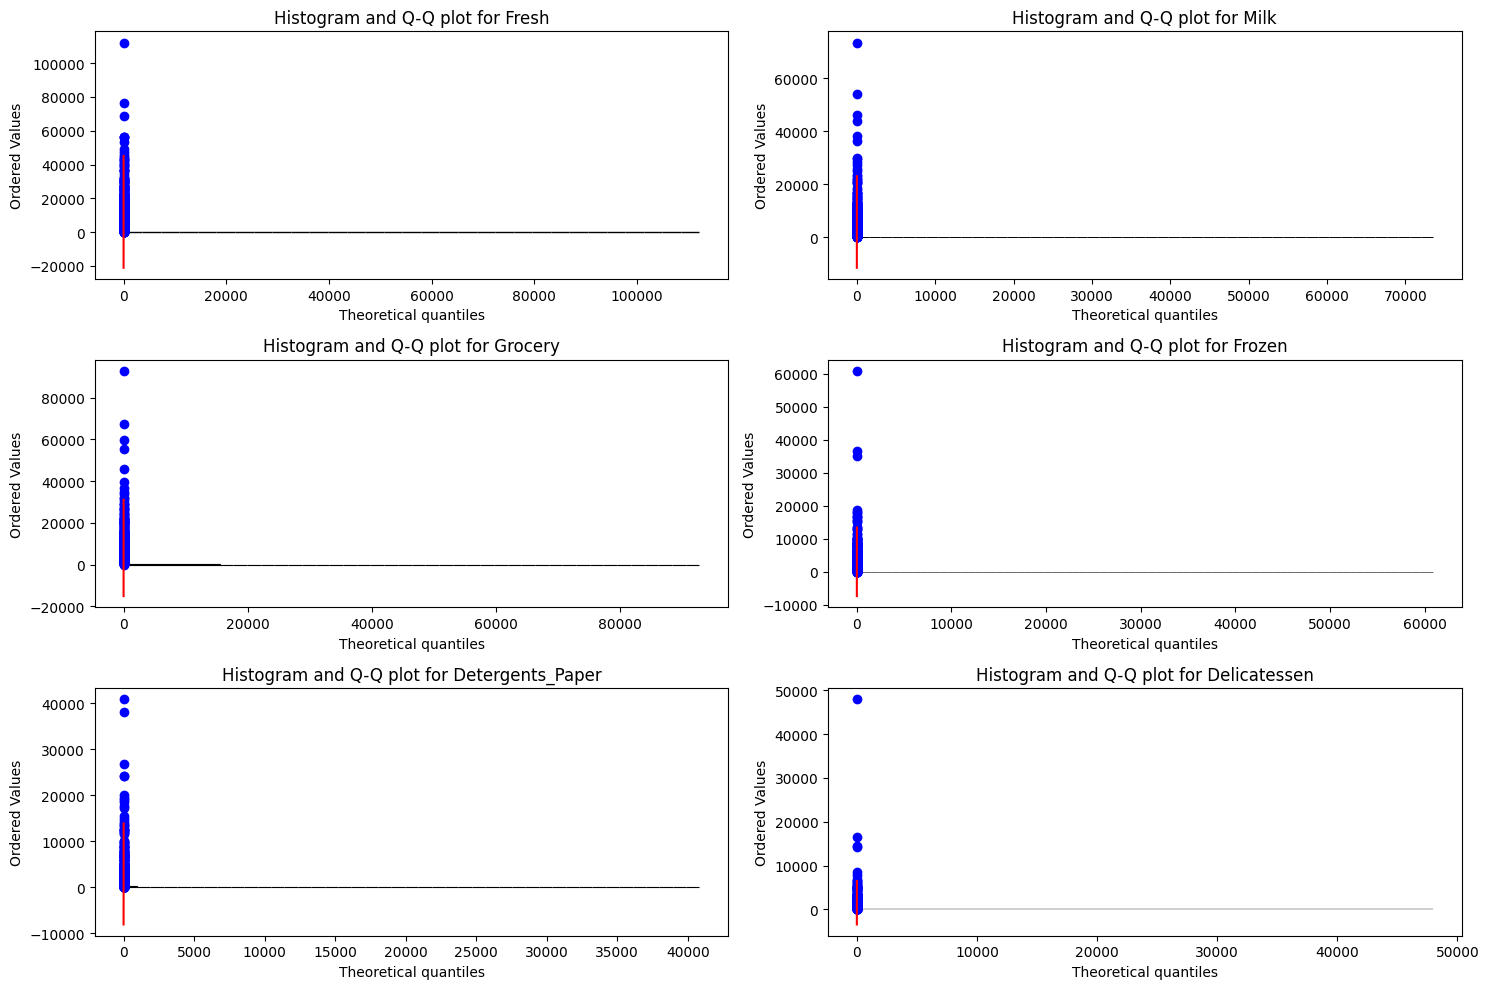

In [67]:
# write your code here

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Generate histograms and normal probability plots for each feature
for i, feature in enumerate(ws_df.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(ws_df[feature], kde=False, color="blue")
    stats.probplot(ws_df[feature], plot=plt)
    plt.title(f'Histogram and Q-Q plot for {feature}')

plt.tight_layout()
plt.show()

# Loop through columns and create plots


5. What do you observe about distribution? (2 points)
Ans: The distributions of the features in the dataset exhibit several notable characteristics:

**Skewness:** Each of the features—Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicatessen—shows a right-skewed distribution. This indicates that the majority of the data points are concentrated on the lower end of the scale, with a long tail extending towards higher values. Such distributions are common in data where the range includes extremely high values relative to the typical data point.
**Non-Normality:** The normal probability plots (Q-Q plots) for each feature reveal that the data does not conform to a normal distribution. In all the plots, the data points significantly deviate from the line that represents what would be expected if the data were normally distributed. The deviations are particularly noticeable at the ends of the distribution, further highlighting the presence of outliers and the skewness.


6. Scale the sample data using the natural logarithm ( 1 point)

In [69]:
# Scale the data using the natural logarithm

log_data = np.log(ws_df + 1)  # Adding 1 to avoid log(0) which is undefined

# Display the first few rows of the log-transformed data
data_log_transformed.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632
3,9.492960,7.087574,8.348064,8.764834,6.230481,7.489412
4,10.026413,8.596189,8.881697,8.272826,7.483244,8.553718


7. Check for Outliers using boxplot ( 2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


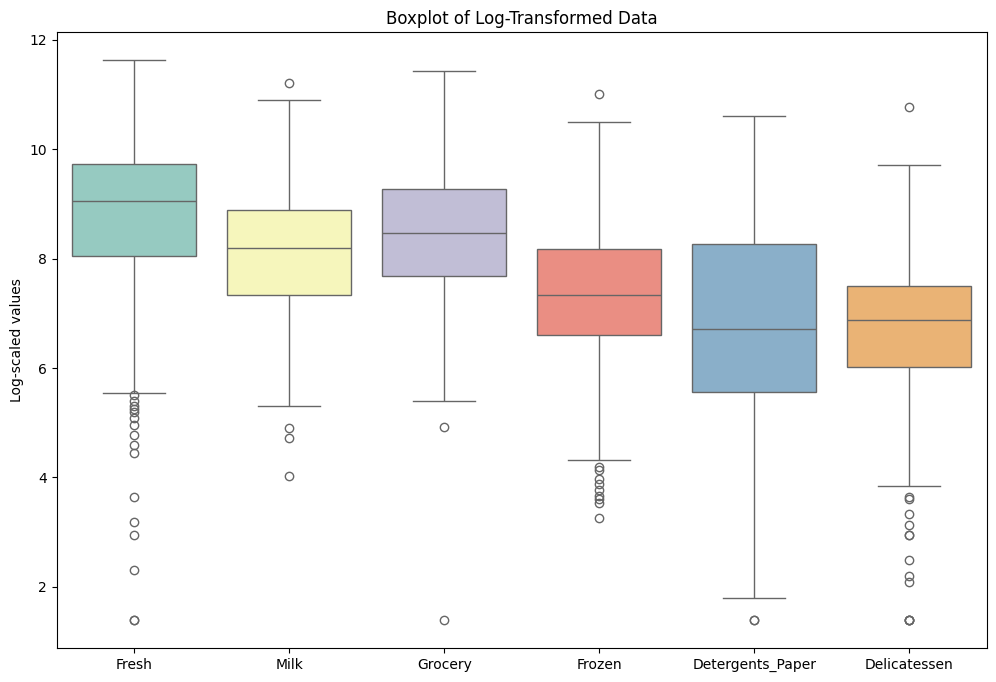

In [70]:
# write your code here
plt.figure(figsize=(12, 8))
sns.boxplot(data=log_data, palette="Set3")
plt.title('Boxplot of Log-Transformed Data')
plt.ylabel('Log-scaled values')
plt.show()


8. Apply natural log to transform long tails and plot the Log Sales Distribution using violinplot (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


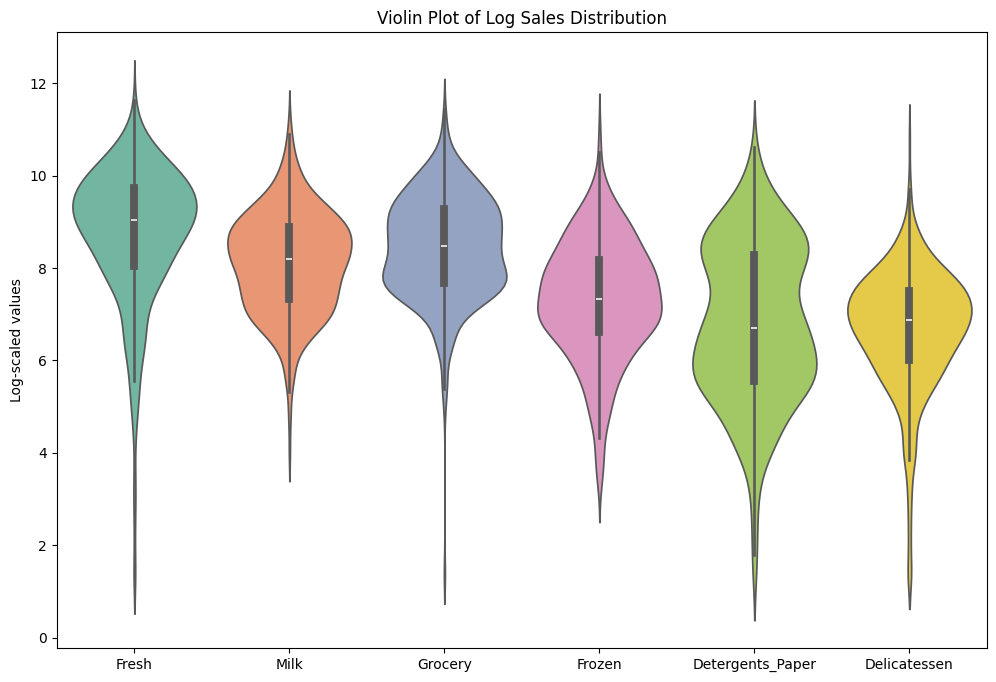

In [71]:
# write your code here
plt.figure(figsize=(12, 8))
sns.violinplot(data=log_data, palette="Set2")
plt.title('Violin Plot of Log Sales Distribution')
plt.ylabel('Log-scaled values')
plt.show()


In [ ]:
# write your code here


9. Remove Outliers using LocalOutlierFactor and plot the Log Sales Distribution using violinplot after removing the outliers. (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


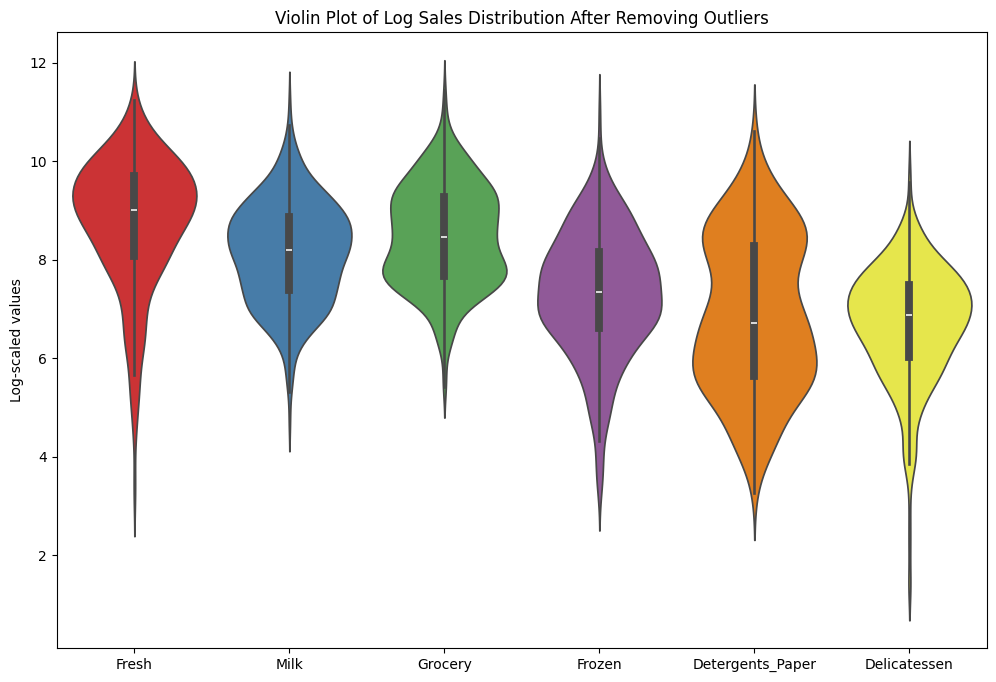

In [72]:
# write your code here

# Initialize the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit the model and predict outliers
outliers = lof.fit_predict(log_data)

# Filter out the outliers
data_filtered = log_data[outliers == 1]

# Create violin plots for the data after removing outliers
plt.figure(figsize=(12, 8))
sns.violinplot(data=data_filtered, palette="Set1")
plt.title('Violin Plot of Log Sales Distribution After Removing Outliers')
plt.ylabel('Log-scaled values')
plt.show()


10. use sns.pairplot to visualize Feature Distributions in your cleaned data (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


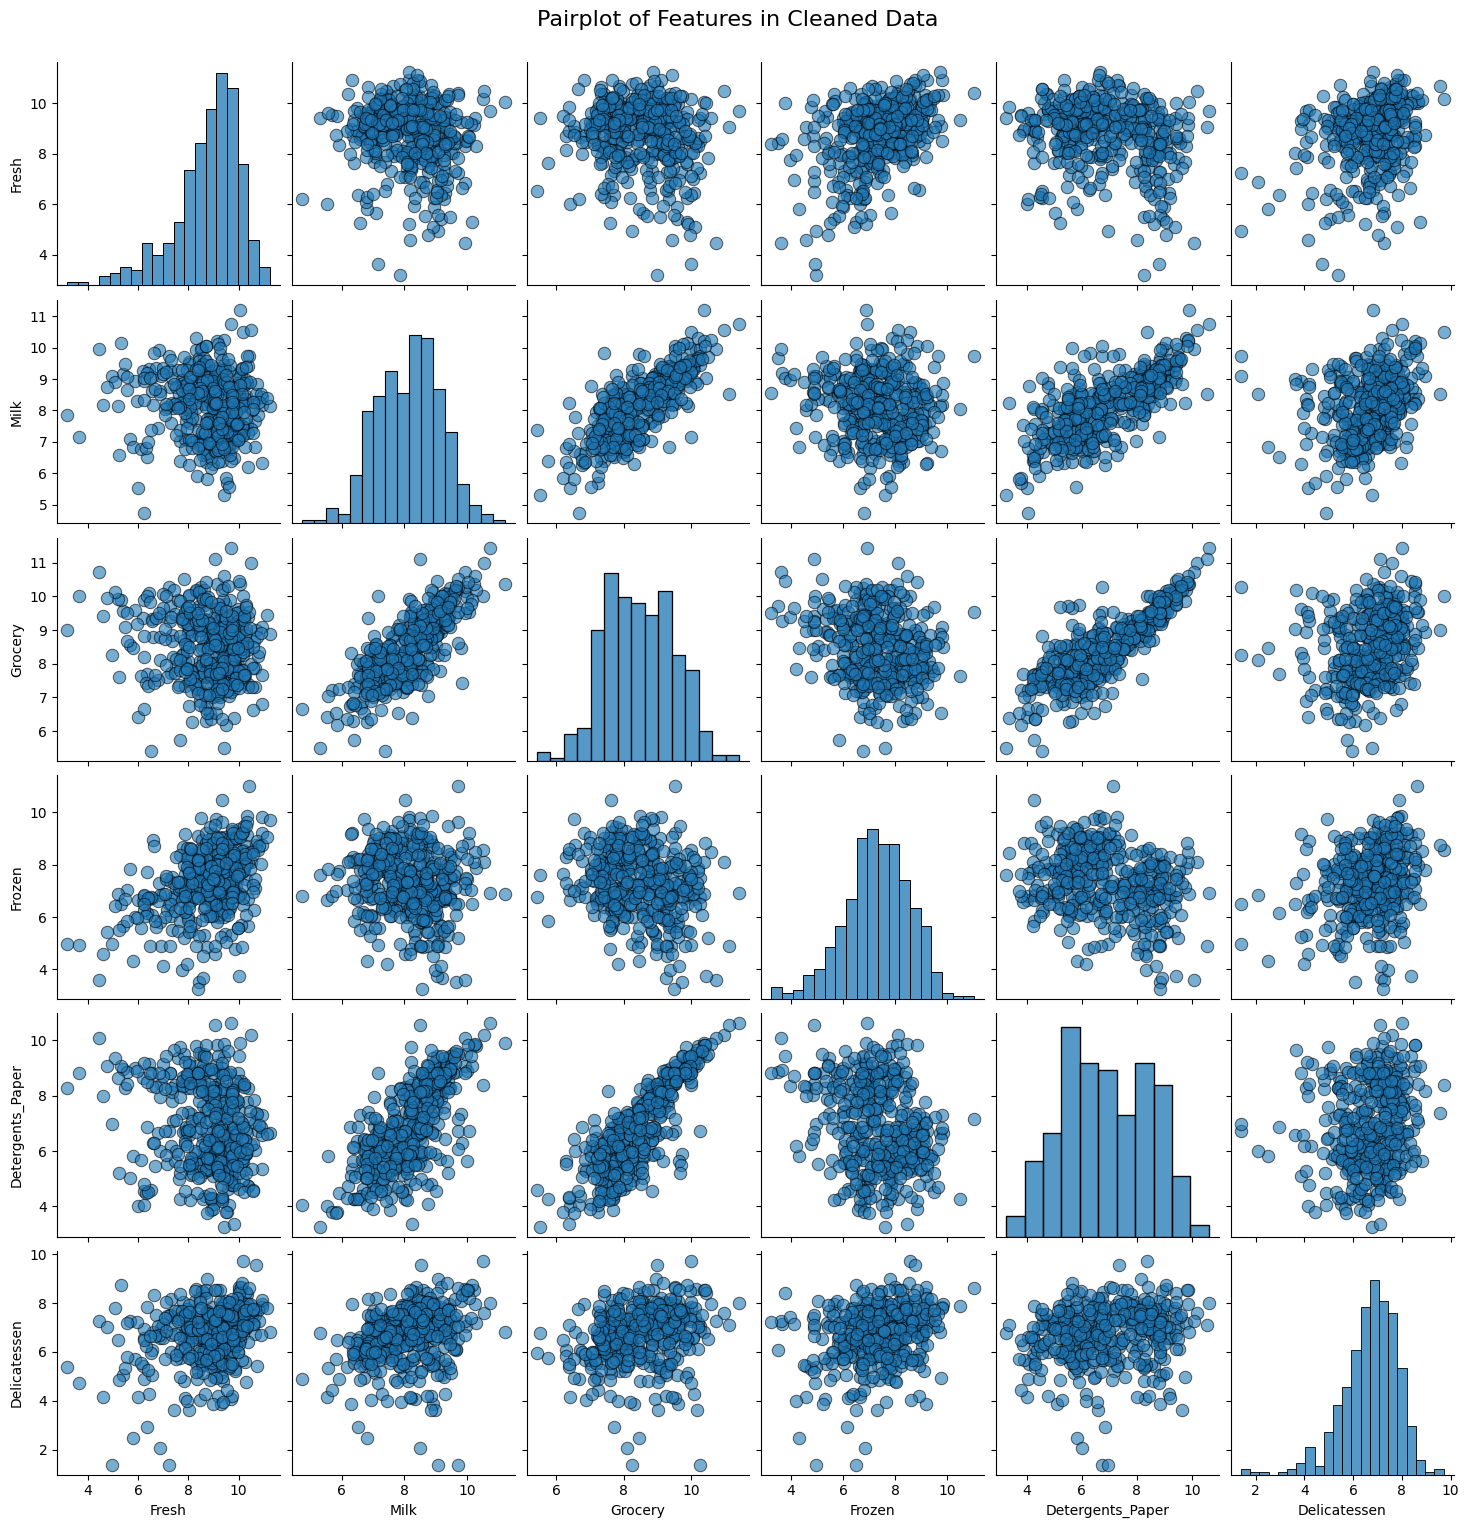

In [73]:
# write your code here
sns.pairplot(data_filtered, plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'})
plt.suptitle('Pairplot of Features in Cleaned Data', size=16, y=1.02)
plt.show()


11. Check for Correlations using sns.clustermap (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


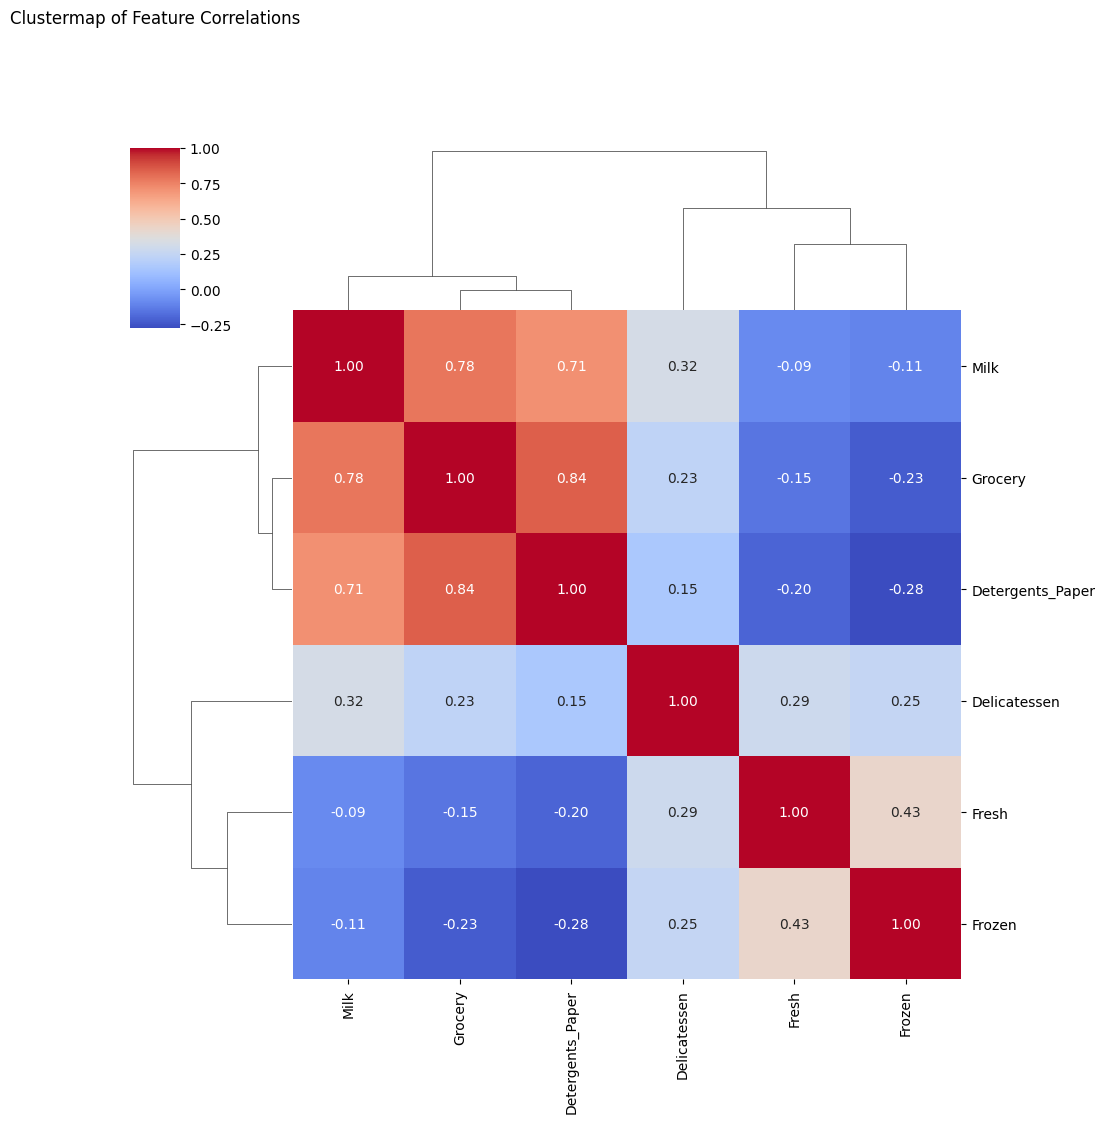

In [74]:
# write your code here
sns.clustermap(data_filtered.corr(), annot=True, fmt=".2f", cmap="coolwarm", figsize=(10, 10))
plt.title('Clustermap of Feature Correlations', pad=90)
plt.show()


12. What do you observe? (2 points)
**Ans:**
**High Correlation Between Some Features:**
The clustermap reveals a strong positive correlation between "Grocery" and "Detergents_Paper", indicated by a high correlation coefficient (close to 1). This suggests that these two features tend to increase together and might share a similar underlying distribution or influencing factors within the dataset.
"Milk" also shows a notable positive correlation with both "Grocery" and "Detergents_Paper", although it's slightly less strong than between "Grocery" and "Detergents_Paper". This relationship points to a potential grouping of these categories in terms of customer purchasing patterns.

**Moderate to Low Correlation Among Other Features:**
Other pairs of features like "Fresh" and "Frozen" or "Fresh" and "Delicatessen" show lower correlation coefficients. These indicate less of a linear relationship, suggesting that movements in one category do not necessarily predict movements in the other within this dataset.

**Clustering Insights:**
The dendrogram structure (tree-like branches connecting the features) shows how features are clustered based on their correlation similarities. "Grocery", "Milk", and "Detergents_Paper" are grouped closely, supporting the numerical correlation data and suggesting that these features have similar behaviors or are affected similarly by underlying factors.
"Fresh", "Frozen", and "Delicatessen" form a separate cluster, indicating a different set of relationships and possibly different influencing factors or customer behaviors regarding these products.


### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved.

13. Biplot: Visualizing Product Relationships in 2D (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


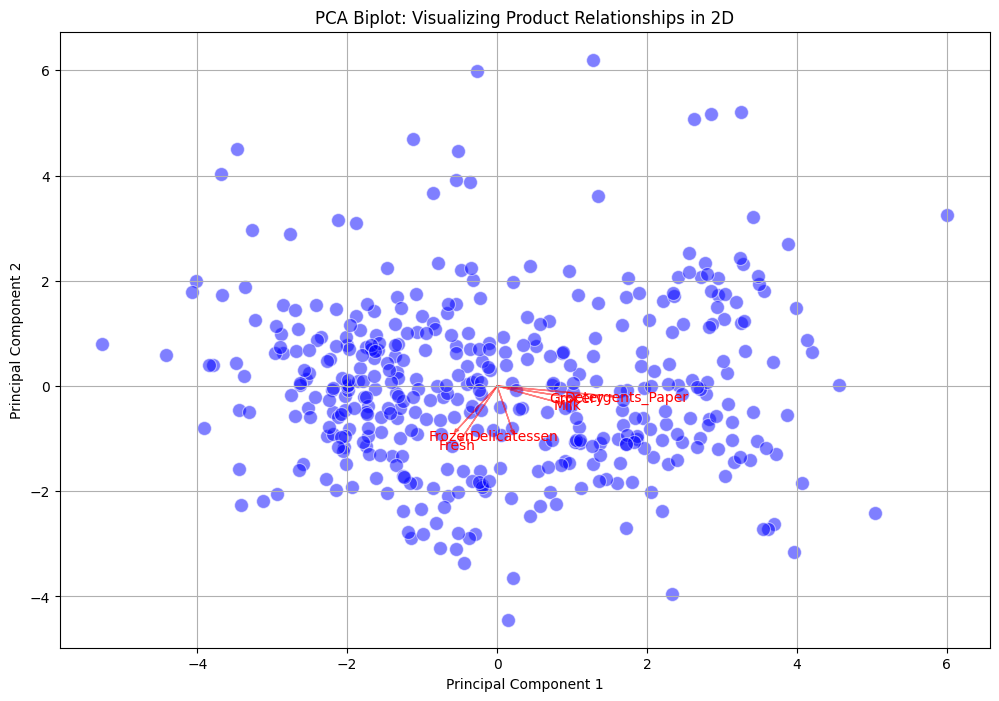

In [75]:
# write your code here

import matplotlib.patches as mpatches

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_filtered)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Calculate the component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Plotting the PCA biplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, color='blue', alpha=0.5)

# Add vector annotations for each original feature
for i, col in enumerate(data_filtered.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, col, color='red', ha='center', va='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot: Visualizing Product Relationships in 2D')
plt.grid(True)
plt.show()


14. Use sns.jointplot to plot x and y in the above code (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


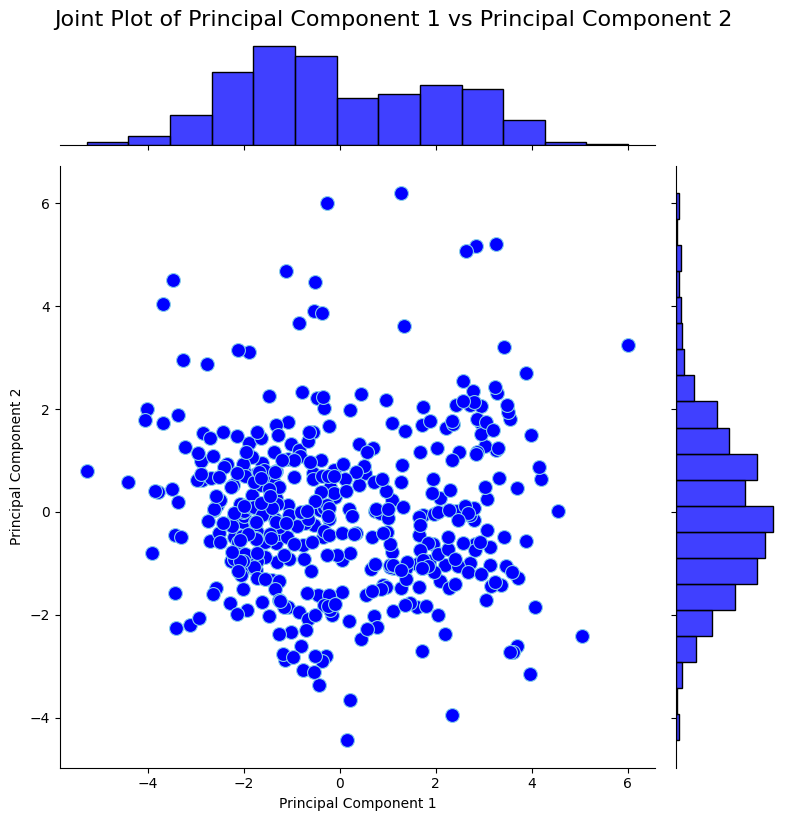

In [76]:
# write your code here

jointplot = sns.jointplot(x='PC1', y='PC2', data=pca_df, kind="scatter", s=100, color='blue', edgecolor="skyblue", height=8)
jointplot.set_axis_labels('Principal Component 1', 'Principal Component 2')
jointplot.fig.suptitle('Joint Plot of Principal Component 1 vs Principal Component 2', fontsize=16, y=1.02)
plt.show()


15. Exploring the new Descriptors of the cleand Data using plot.bar (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


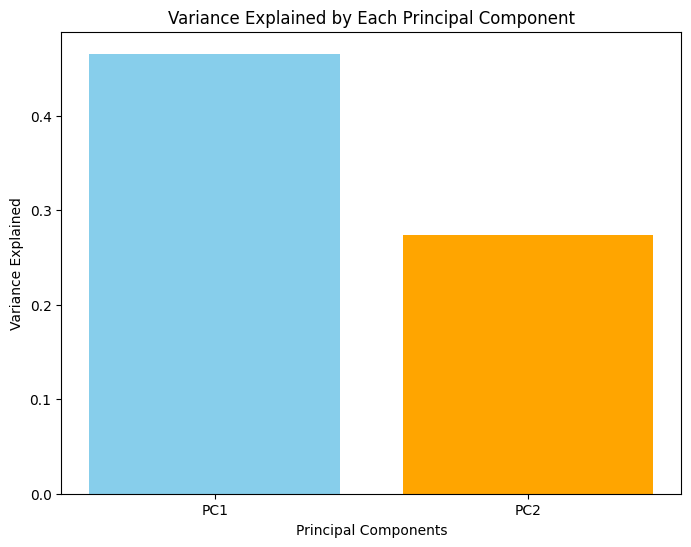

In [77]:
# write your code here
# Calculate the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Create a bar plot for the variance explained by each principal component
plt.figure(figsize=(8, 6))
plt.bar(['PC1', 'PC2'], explained_variance, color=['skyblue', 'orange'])
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.show()


In [78]:
#Calculation for Q16.
# Calculate the total variance explained by the first two principal components
total_variance_explained = explained_variance.sum()
total_variance_explained


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7394149147042222

16. How much approximately the first and second features of explain of variance in total? (1 point)
**Ans:**
The first and second principal components together explain approximately 73.94% of the total variance in the dataset.


---
## All set

Please make sure you execute each cell before you submit your file; this is important because if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_3 .
---